In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
data= pd.read_csv("C:\\Users\\rajan yadav\\Downloads\\Breast_cancer_dataset (1).csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
plt.show()

print(data.shape)

(569, 33)


In [18]:
data=data.drop(["id","Unnamed: 32"],axis=1)

In [21]:
def check_messing(df):
    missing=df.isnull().sum()
    total=df.shape[0]
    percentage=(missing/total)*100
    missing_data=pd.DataFrame({"Missing Values":missing,"Percentage":percentage})
    return missing_data
print(check_messing(data))

                         Missing Values  Percentage
diagnosis                             0         0.0
radius_mean                           0         0.0
texture_mean                          0         0.0
perimeter_mean                        0         0.0
area_mean                             0         0.0
smoothness_mean                       0         0.0
compactness_mean                      0         0.0
concavity_mean                        0         0.0
concave points_mean                   0         0.0
symmetry_mean                         0         0.0
fractal_dimension_mean                0         0.0
radius_se                             0         0.0
texture_se                            0         0.0
perimeter_se                          0         0.0
area_se                               0         0.0
smoothness_se                         0         0.0
compactness_se                        0         0.0
concavity_se                          0         0.0
concave poin

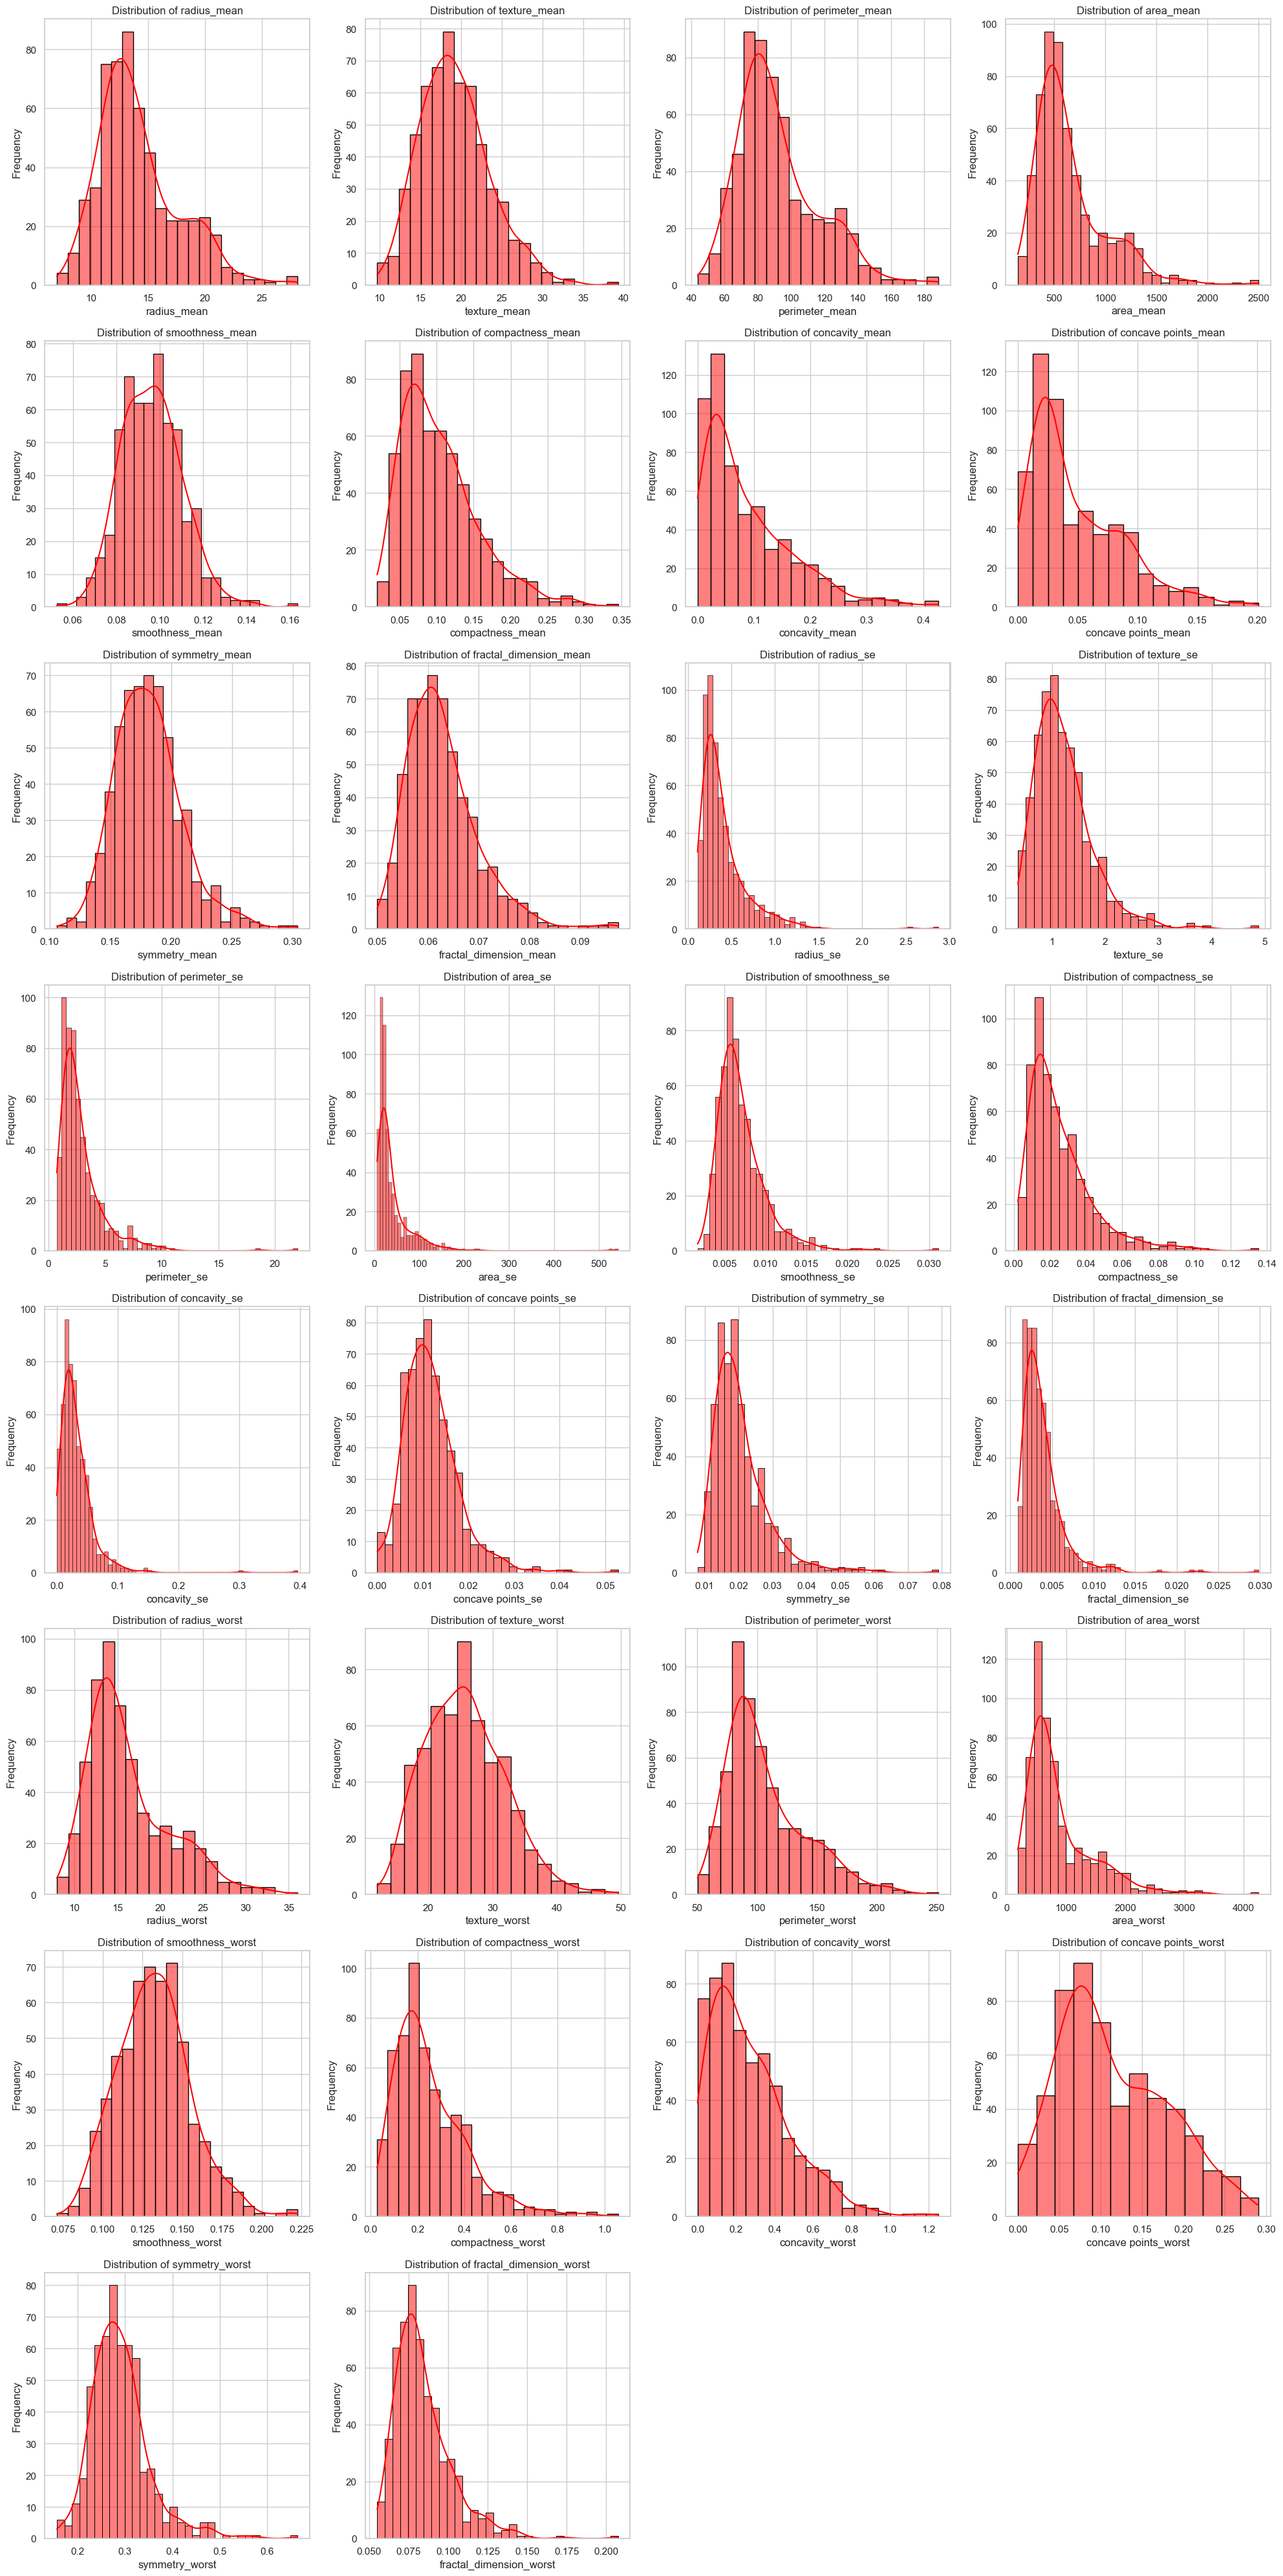

In [22]:
sns.set_style(style="whitegrid")
numeric_col=data.select_dtypes(include="number")
cols_per_row=4
num_cols=len(numeric_col.columns)
num_rows=(num_cols+cols_per_row-1)//cols_per_row
fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(20, 5*num_rows))
axes = axes.flatten()
for i, col in enumerate(numeric_col.columns):
    sns.histplot(data[col], kde=True, ax=axes[i],color='red', edgecolor='black')
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")
for j in range(i+1, len(axes)):
    axes[j].axis('off')
plt.tight_layout()

<Axes: xlabel='texture_mean', ylabel='Count'>

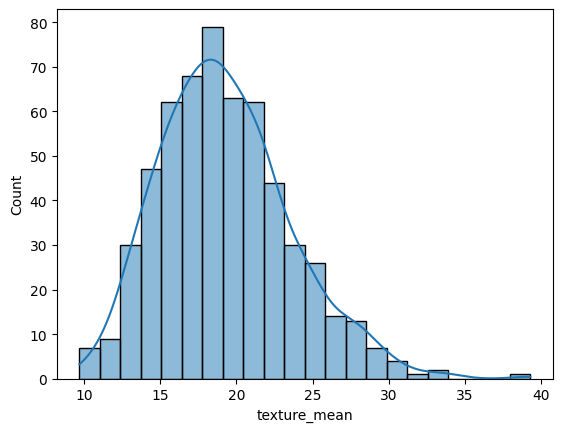

In [10]:
sns.histplot(data["texture_mean"], kde=True)

In [11]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [12]:
data["diagnosis"].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

np.int64(0)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [15]:
data.shape

(569, 31)

In [16]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [17]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [18]:
x=data.drop(["diagnosis"], axis=1)
y=data["diagnosis"]

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [20]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion="log_loss")
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='log_loss')

In [21]:

y_pred = model.predict(x_test)
y_pred2=model.predict(x_train)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
accuracy2 = accuracy_score(y_train, y_pred2)
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Accuracy on training set: {accuracy2 * 100:.2f}%")

Accuracy: 95.61%
Accuracy on training set: 100.00%


In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [23]:

sample_df = pd.read_csv("C:\\Users\\rajan yadav\\Downloads\\Breast_cancer_dataset (1).csv", encoding='ascii', delimiter=',')


In [24]:
sample_df.drop(['Unnamed: 32','id'], axis=1, inplace=True)
sample_df.head()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [25]:
sample_df.shape

(569, 31)

In [26]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [27]:
dat2=pd.read_csv("C:\\Users\\rajan yadav\\Downloads\\BMW_Car_Sales_Classification.csv")

In [28]:
dat2.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low


In [29]:
dat2["Region"].unique()

array(['Asia', 'North America', 'Middle East', 'South America', 'Europe',
       'Africa'], dtype=object)

In [30]:
def check_missing(df):
    missing=df.isnull().sum()
    total=df.shape[0]
    percentage=(missing/total)*100
    result=pd.DataFrame({"missing":missing,"percentage":percentage}).sort_values(by="percentage",ascending=False)
    return result#[result["missing"]<0]
print(check_missing(dat2))

                      missing  percentage
Model                       0         0.0
Year                        0         0.0
Region                      0         0.0
Color                       0         0.0
Fuel_Type                   0         0.0
Transmission                0         0.0
Engine_Size_L               0         0.0
Mileage_KM                  0         0.0
Price_USD                   0         0.0
Sales_Volume                0         0.0
Sales_Classification        0         0.0


In [31]:
dat2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.2+ MB


In [32]:
dat2.shape

(50000, 11)

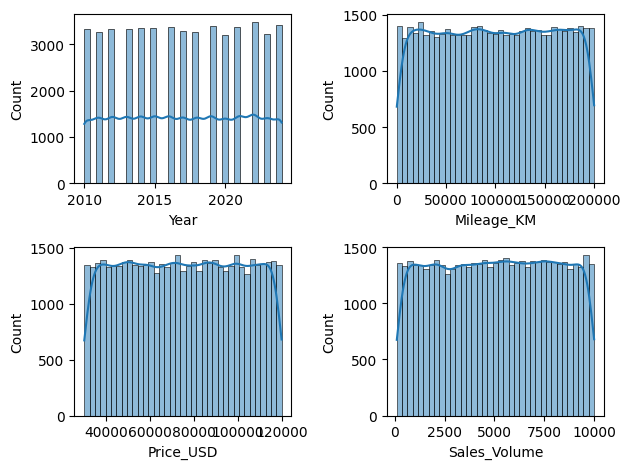

In [33]:
def plotting(var,num):
    plt.subplot(2,2,num)
    sns.histplot(dat2[var],kde=True)
plotting("Year",1)
plotting("Mileage_KM",2)
plotting("Price_USD",3)
plotting("Sales_Volume",4)
plt.tight_layout()

In [34]:
x=dat2.drop(["Sales_Classification"],axis=1)
y=dat2["Sales_Classification"]

In [35]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Model          50000 non-null  object 
 1   Year           50000 non-null  int64  
 2   Region         50000 non-null  object 
 3   Color          50000 non-null  object 
 4   Fuel_Type      50000 non-null  object 
 5   Transmission   50000 non-null  object 
 6   Engine_Size_L  50000 non-null  float64
 7   Mileage_KM     50000 non-null  int64  
 8   Price_USD      50000 non-null  int64  
 9   Sales_Volume   50000 non-null  int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 3.8+ MB


In [36]:
dat2["Engine_Size_L"].unique()

array([3.5, 1.6, 4.5, 1.7, 2.1, 1.9, 1.8, 3. , 2.4, 3.8, 2.3, 2.6, 3.1,
       3.7, 4.8, 3.3, 3.2, 2.2, 4.1, 2. , 4.7, 4.3, 4. , 3.6, 4.9, 3.4,
       2.8, 3.9, 1.5, 4.2, 2.5, 2.7, 4.6, 5. , 4.4, 2.9])

In [37]:
numeric=["Year","Mileage_KM","Price_USD","Sales_Volume","Engine_Size_L","Model","Region","Color","Fuel_Type","Transmission"]

In [38]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x["Model"]=le.fit_transform(x["Model"])
x["Region"]=le.fit_transform(x["Region"])
x["Color"]=le.fit_transform(x["Color"])
x["Fuel_Type"]=le.fit_transform(x["Fuel_Type"])
x["Transmission"]=le.fit_transform(x["Transmission"])


In [39]:
x["Fuel_Type"].unique()

array([3, 2, 0, 1])

In [40]:
x["Transmission"].unique()

array([1, 0])

In [41]:
from sklearn.preprocessing import RobustScaler
robust=RobustScaler()

In [42]:
x[numeric]=robust.fit_transform(x[numeric])

In [43]:
x.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume
0,-0.666667,-0.125,-0.333333,0.000000,0.5,0.0,0.176471,0.511283,0.525042,0.649189
1,0.833333,-0.500,0.666667,0.000000,0.0,-1.0,-0.941176,0.211867,0.093100,-0.335202
2,-0.666667,0.625,0.666667,-0.666667,0.5,-1.0,0.764706,-0.889950,0.846438,0.385311
3,0.166667,0.875,0.333333,-0.666667,0.5,-1.0,-0.882353,-0.728042,-0.310675,-0.210133
4,-0.500000,0.375,1.000000,-1.000000,-1.0,0.0,-0.647059,0.216446,-0.555688,-0.405516


In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.80,random_state=42)

In [68]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression(max_iter=10, random_state=42)
log.fit(x_train,y_train)

LogisticRegression(max_iter=10, random_state=42)

In [69]:
y_pred=log.predict(x_test)

In [70]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,y_pred)
print(acc)

0.9981


In [71]:
y_train_pred=log.predict(x_train)
acc2=accuracy_score(y_train,y_train_pred)
print(acc2)

0.9976


In [49]:
ds=pd.read_csv("C:\\Users\\rajan yadav\\Downloads\\ai_human_content_detection_dataset.csv")

In [50]:
ds.head()

,text_content,content_type,word_count,character_count,sentence_count,lexical_diversity,avg_sentence_length,avg_word_length,punctuation_ratio,flesch_reading_ease,gunning_fog_index,grammar_errors,passive_voice_ratio,predictability_score,burstiness,sentiment_score,label
0,Score each cause. Quality throughout beautiful...,academic_paper,288,1927,54,0.9514,5.33,5.69,0.0280,53.08,7.41,1,0.1041,105.86,0.5531,0.2034,1
1,Board its rock. Job worker break tonight coupl...,essay,253,1719,45,0.9723,5.62,5.80,0.0262,50.32,8.10,6,0.2045,100.29,0.5643,0.4854,1
2,Way debate decision produce. Dream necessary c...,academic_paper,420,2849,75,0.9071,5.60,5.79,0.0263,46.86,7.86,5,0.2308,96.88,0.4979,-0.2369,1
3,Story turn because such during open model. Tha...,creative_writing,196,1310,34,0.9592,5.76,5.69,0.0260,53.80,7.00,2,0.1912,88.79,0.6241,NaN,1
4,Place specific as simply leader fall analysis....,news_article,160,1115,28,0.9688,5.71,5.97,0.0251,44.53,8.29,0,0.1318,26.15,0.2894,NaN,1


In [51]:
import pandas as pd
df=pd.DataFrame({"label":["ai","human","dog","ai"]})
print(df["label"].dtype)

object


In [52]:
print(df)

   label
0     ai
1  human
2    dog
3     ai


In [53]:
df["label"] = df["label"].astype("category")
print(df["label"].dtype) 

category


In [54]:
print(df)

   label
0     ai
1  human
2    dog
3     ai


In [61]:
import pandas as pd
import numpy as np

data = pd.Series(np.random.choice(["Human", "AI","DOG","dosti"], size=1_000))

print("Object dtype memory:", data.memory_usage(deep=True))

cat_data = data.astype("category")
print("Category dtype memory:", cat_data.memory_usage(deep=True))


Object dtype memory: 52897
Category dtype memory: 1515


In [62]:
print(cat_data)

0         AI
1         AI
2      Human
3      Human
4      Human
       ...  
995       AI
996       AI
997    Human
998    dosti
999    Human
Length: 1000, dtype: category
Categories (4, object): ['AI', 'DOG', 'Human', 'dosti']


In [63]:
print(data)

0         AI
1         AI
2      Human
3      Human
4      Human
       ...  
995       AI
996       AI
997    Human
998    dosti
999    Human
Length: 1000, dtype: object
